In [3]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
%matplotlib inline

First, need to steal the hack that loops through all the shapes I save...

In [8]:
slice_dirs =  sorted(glob.glob('../slices/c50_output/*'))
print slice_dirs[0:5]

['../slices/c50_output/4400_4600_10100_10300_c50', '../slices/c50_output/4400_4600_8900_9100_c50', '../slices/c50_output/4400_4600_9100_9300_c50', '../slices/c50_output/4400_4600_9300_9500_c50', '../slices/c50_output/4400_4600_9500_9700_c50']


In [9]:
def centroid(z):
    return np.sum(z)/len(z)

In [ ]:
#def get_all_mean_radii(folder):
    #slice_dirs = sorted(glob.glob('folder/*'))
    

In [94]:
basepix = [4400,6000,8900,10300]
diams_50 = []
for sld in slice_dirs:
    fname = sld.split('/')[-1]
    rp1,rp2,cp1,cp2,blur = fname.split('_')
    #print rp1,rp2,cp1,cp2
    shapes = glob.glob(sld+'/shapes/*_xypoints.npy')
    for shfile in shapes:
        x,y = np.load(shfile)
        adjx = x+int(cp1)-basepix[2]
        adjy = y+int(rp1)-basepix[0]
        centx, centy = centroid(adjx),centroid(adjy)

        dists = np.sqrt((adjx-centx)**2 + (adjy-centy)**2)
        diams_50.append(np.mean(dists)*2)
        
diams_50 = np.array(diams_50)*.3 #convert pixels to km

In [95]:
diams_50_S = pd.Series(diams_50)

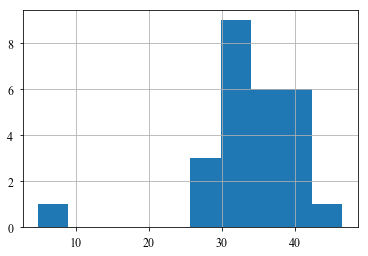

In [103]:
bins = np.arange(0,50,1)
diams_50_c = pd.cut(diams_50_S,bins)
diams_50_S.hist()

In [97]:
basepix = [4400,6000,8900,10300]
diams_20 = []
for sld in sorted(glob.glob('../slices/c20_output/*')):
    fname = sld.split('/')[-1]
    rp1,rp2,cp1,cp2,blur = fname.split('_')
    #print rp1,rp2,cp1,cp2
    shapes = glob.glob(sld+'/shapes/*_xypoints.npy')
    for shfile in shapes:
        x,y = np.load(shfile)
        adjx = x+int(cp1)-basepix[2]
        adjy = y+int(rp1)-basepix[0]
        centx, centy = centroid(adjx),centroid(adjy)

        dists = np.sqrt((adjx-centx)**2 + (adjy-centy)**2)
        diams_20.append(np.mean(dists)*2)
        
diams_20 = np.array(diams_20)*.3 #convert pixels to km

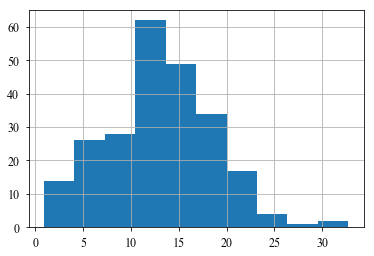

In [98]:
diams_20_S = pd.Series(diams_20)
diams_20_S.hist()

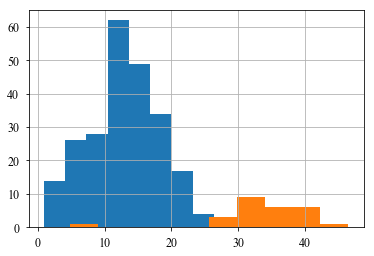

In [99]:
diams_20_S = pd.Series(diams_20)
diams_20_S.hist()
diams_50_S.hist()

In [100]:
basepix = [4400,6000,8900,10300]
diams_10 = []
for sld in sorted(glob.glob('../slices/c10_output/*')):
    fname = sld.split('/')[-1]
    rp1,rp2,cp1,cp2,blur = fname.split('_')
    #print rp1,rp2,cp1,cp2
    shapes = glob.glob(sld+'/shapes/*_xypoints.npy')
    for shfile in shapes:
        x,y = np.load(shfile)
        adjx = x+int(cp1)-basepix[2]
        adjy = y+int(rp1)-basepix[0]
        centx, centy = centroid(adjx),centroid(adjy)

        dists = np.sqrt((adjx-centx)**2 + (adjy-centy)**2)
        diams_10.append(np.mean(dists)*2)
        
diams_10 = np.array(diams_10)*.3 #convert pixels to km

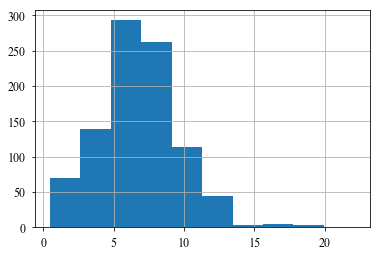

In [101]:
diams_10_S = pd.Series(diams_10)
diams_10_S.hist()

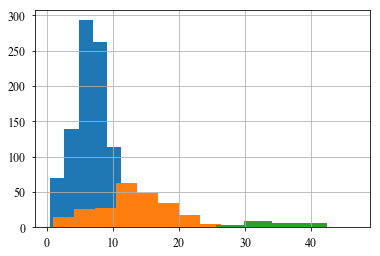

In [142]:
diams_10_S = pd.Series(diams_10)
diams_10_S.hist()
diams_20_S.hist()
diams_50_S.hist()

In [104]:
diams_S = pd.concat([diams_10_S,diams_20_S,diams_50_S])

In [105]:
diams_Sc = pd.cut(diams_S,bins)
count_Sc = diams_S.groupby(diams_Sc).count()
medSc = diams_S.groupby(diams_Sc).median()

In [161]:
medSc = diams_S.groupby(diams_Sc).median()

In [162]:
newdf = pd.concat([count_Sc,medSc],axis=1,keys=['count','median'])

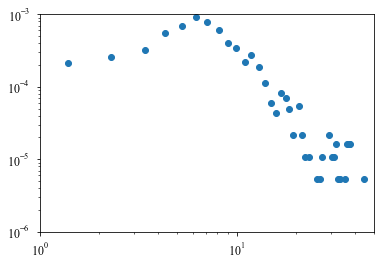

In [213]:
plt.figure()
plt.scatter(newdf['median']/.3*newsc,newdf['count']/(area))
#plt.plot([1,50],[1.e-3,1.e-3])
plt.yscale('log')
plt.ylim(1.e-6,1.e-3)
plt.xlim(1.,5.e+1)
plt.xscale('log')
plt.show()

In [203]:
pixelsq = 1400*newsc*1600*newsc
area = pixelsq
area

184801.21297530248

In [202]:
Req = 1188300.0/1000.
lat = (1-(np.mean([4400])/(12444/2.)))
print lat,lat*180/np.pi
a = Req* np.cos(lat)
print a
newsc = a/Req/1000.*300
print newsc


0.292831886853 16.7780312235
1137.71436595
0.287229074968


In [151]:
10*0.3

3.0

In [152]:
newsc*1600, newsc*1400

(473.53934780439585, 414.34692932884639)

In [154]:
Req*2*np.pi/24888*1600

479.99415625339134

In [156]:
450/7.

64.28571428571429

In [157]:
65/4.

16.25

In [158]:
import scipy.stats as sps

In [244]:
fitdf = newdf[(newdf['median']>7.)&(newdf['median']<30)]

In [245]:
fit = sps.linregress(np.log(fitdf['median']),np.log(fitdf['count']))

In [246]:
fit

LinregressResult(slope=-3.6987473420425534, intercept=12.800503324322319, rvalue=-0.96272218943209553, pvalue=3.0385693429263861e-12, stderr=0.23841385964091288)

In [174]:
newdf_sort = newdf.sort_values('median',ascending=False)

In [185]:
newdf['cumfreq'] = newdf_sort['count'].cumsum()
newdf['cumfreq'][newdf['median'].isnull()] == 0.

(25, 26]    False
(29, 30]    False
(40, 41]    False
(41, 42]    False
(42, 43]    False
(43, 44]    False
(44, 45]    False
(45, 46]    False
(47, 48]    False
(48, 49]    False
Name: cumfreq, dtype: bool

In [191]:
newdf = newdf[~newdf['median'].isnull()]

In [210]:
newdf_2 = newdf[(newdf['median']>6.)].sort_values('median',ascending=False)
newdf_2['cumfreq'] = newdf_2['count'].cumsum()

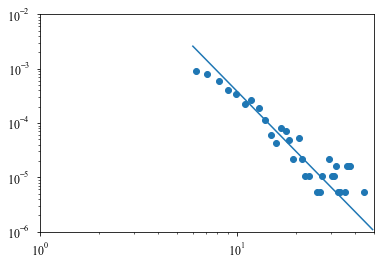

In [247]:
plt.figure()
plt.scatter(newdf_2['median']/.3*newsc,newdf_2['count']/(area))
plt.plot(np.arange(6,50),np.exp(np.log(np.arange(6,50))*fit[0]+fit[1])/area)
plt.yscale('log')
plt.ylim(1.e-6,1.e-2)
plt.xlim(1.,5.e+1)
plt.xscale('log')
plt.show()

In [242]:
print np.exp(np.log(np.arange(6,50))*fit[0]+fit[1])

[ 239.8517626   154.31932676  105.32122517   75.19307321   55.62550584
   42.35035218   33.01800458   26.26048587   21.24360556   17.43849071
   14.49852466   12.18993822   10.35108189    8.86769195    7.65740967
    6.6598301     5.82995141    5.13376986    4.54526002    4.04426824
    3.61501968    3.24504456    2.92439571    2.64507118    2.40058343
    2.18563429    1.99586757    1.82767872    1.67806745    1.54452239
    1.4249304     1.3175046     1.22072688    1.13330182    1.05411936
    0.9822245     0.91679252    0.85710866    0.80255138    0.75257836
    0.70671499    0.66454468    0.6257007     0.58985935]


In [265]:
ft = pd.concat([diams_50_S,diams_20_S])
ftc = pd.cut(ft,bins)
ft1 = ft.groupby(ftc).count()
ft2 = ft.groupby(ftc).mean()
ftdf = pd.concat([ft1,ft2],axis=1,keys=['count','median'])
ftdf['cumfreq'] = ftdf.sort_values('median',ascending=False)['count'].cumsum()

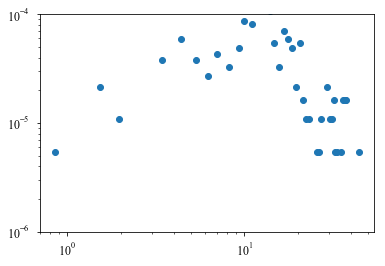

In [264]:
plt.figure()
plt.scatter(ftdf['median']/.3*newsc,ftdf['count']/area)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1.e-6,1.e-4)
plt.show()

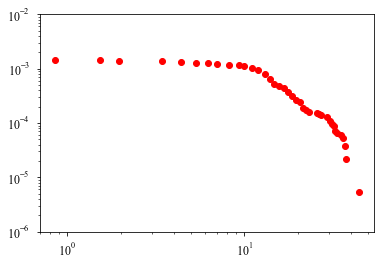

In [270]:
plt.figure()
plt.scatter(ftdf['median']/.3*newsc,ftdf['cumfreq']/area,c='r')
plt.yscale('log')
plt.xscale('log')
plt.ylim(1.e-6,1.e-2)
plt.show()

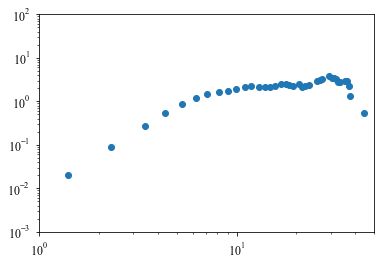

In [273]:
plt.figure()
plt.scatter(newdf['median']/.3*newsc,newdf['cumfreq']/(area)/newdf['median']**-3)
#plt.plot([1,50],[1.e-3,1.e-3])
plt.yscale('log')
plt.ylim(1.e-3,1.e2)
plt.xlim(1.,5.e+1)
plt.xscale('log')
plt.show()

In [274]:
415*475

197125